# Tutorial 01 - Calculating Magnitudes of Evoked Compound Action Potentials

We have included several methods to allow the user to calculate the magnitude of an action potential.  This is intedended to be an intermediate step with the end goal being to establish dose response curves plotting the magnitude of response against the amplitude of stimulation.

In [20]:
import pyCAP
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
sns.set_context("paper")

#### Set the file_location to the included sample data and import data using the Ephys class.
Note: You'll see some additional variables here that account for the delay between the onset of the recording and the onset of the stimulus.

In [2]:
file_location = r"D:\20191119\TDT\Imthera_Pig_Exeriment_25Hz-191119\pnpig191119-191119-122010"
data_ephys = pyCAP.Ephys(data=file_location, stores=['RawE', 'RawG'],
                         rz_sample_rate=25, si_sample_rate=25, sample_delay=11)

read from t=0s to t=865.38s


#### Groom  & Filter the Data

In [3]:
# Groom Data
data_ephys = data_ephys.remove_ch('RawG 4')
rec_ch_names = ['LIFE 1', 'LIFE 2', 'LIFE 3', 'LIFE 4', 'EMG 1', 'EMG 2', 'EMG 3']
rec_ch_types = ['LIFE', 'LIFE', 'LIFE', 'LIFE', 'EMG', 'EMG', 'EMG']
data_ephys = data_ephys.set_ch_names(rec_ch_names)
data_ephys = data_ephys.set_ch_types(rec_ch_types)

# Filter Data
data_ephys = data_ephys.filter_powerline()
data_ephys = data_ephys.filter_median(btype='highpass')
data_ephys = data_ephys.filter_gaussian(Wn=4000, btype='lowpass')

#### Initiate an instance of the Stim class (this will get passed to the ECAP class, which does our calculations)

In [4]:
data_stim = pyCAP.Stim(file_location)

read from t=0s to t=865.38s


#### Initiate an instance of the ECAP class (this takes as an argument the distances from the stimulating electrode to the recording electrode) and average the data across stimulation trains, per stimulation

In [10]:
data_ecap = pyCAP.ECAP(data_ephys, data_stim, distance_log=[7.7, 8.3, 8.5, 8.6])
data_ecap.average_data()

Begin Averaging Data
Finished Averaging Data


#### The method calculate_AUC within the ECAP class will calculate the area under the curve for the entire averaged data

In [11]:
data_ecap.calculate_AUC()

#### Let's pull this data into a pandas DataFrame and take a look

In [13]:
df = data_ecap.master_df
df.head()

,AUC (Vs),Calculation Type,Calculation Window,onset time (s),offset time (s),period (ms),frequency (Hz),pulse count,pulse amplitude (μA),duration (ms),pulse duration (ms),interphase delay (ms),channel,Recording Electrode
0,0.000031,RMS,A-alpha,12.429967,42.443406,40.017918,24.988806,750,-2000.0,30013.438225,0.4,0.0,1,0
1,0.000020,RMS,A-beta,12.429967,42.443406,40.017918,24.988806,750,-2000.0,30013.438225,0.4,0.0,1,0
2,0.000005,RMS,A-gamma,12.429967,42.443406,40.017918,24.988806,750,-2000.0,30013.438225,0.4,0.0,1,0
3,0.000004,RMS,A-delta,12.429967,42.443406,40.017918,24.988806,750,-2000.0,30013.438225,0.4,0.0,1,0
4,0.000005,RMS,B,12.429967,42.443406,40.017918,24.988806,750,-2000.0,30013.438225,0.4,0.0,1,0


##### You'll note that our stimulation amplitudes (pulse amplitude (μA))  are all negative. This is the convention for cathodic based stimulation.  Let's change these from negative to positive to make figures more intuitive

In [16]:
df['pulse amplitude (μA)'] = df['pulse amplitude (μA)'] * -1
df.head()

,AUC (Vs),Calculation Type,Calculation Window,onset time (s),offset time (s),period (ms),frequency (Hz),pulse count,pulse amplitude (μA),duration (ms),pulse duration (ms),interphase delay (ms),channel,Recording Electrode
0,0.000031,RMS,A-alpha,12.429967,42.443406,40.017918,24.988806,750,2000.0,30013.438225,0.4,0.0,1,0
1,0.000020,RMS,A-beta,12.429967,42.443406,40.017918,24.988806,750,2000.0,30013.438225,0.4,0.0,1,0
2,0.000005,RMS,A-gamma,12.429967,42.443406,40.017918,24.988806,750,2000.0,30013.438225,0.4,0.0,1,0
3,0.000004,RMS,A-delta,12.429967,42.443406,40.017918,24.988806,750,2000.0,30013.438225,0.4,0.0,1,0
4,0.000005,RMS,B,12.429967,42.443406,40.017918,24.988806,750,2000.0,30013.438225,0.4,0.0,1,0


#### Now, let's make a nice plot of our A-alphas

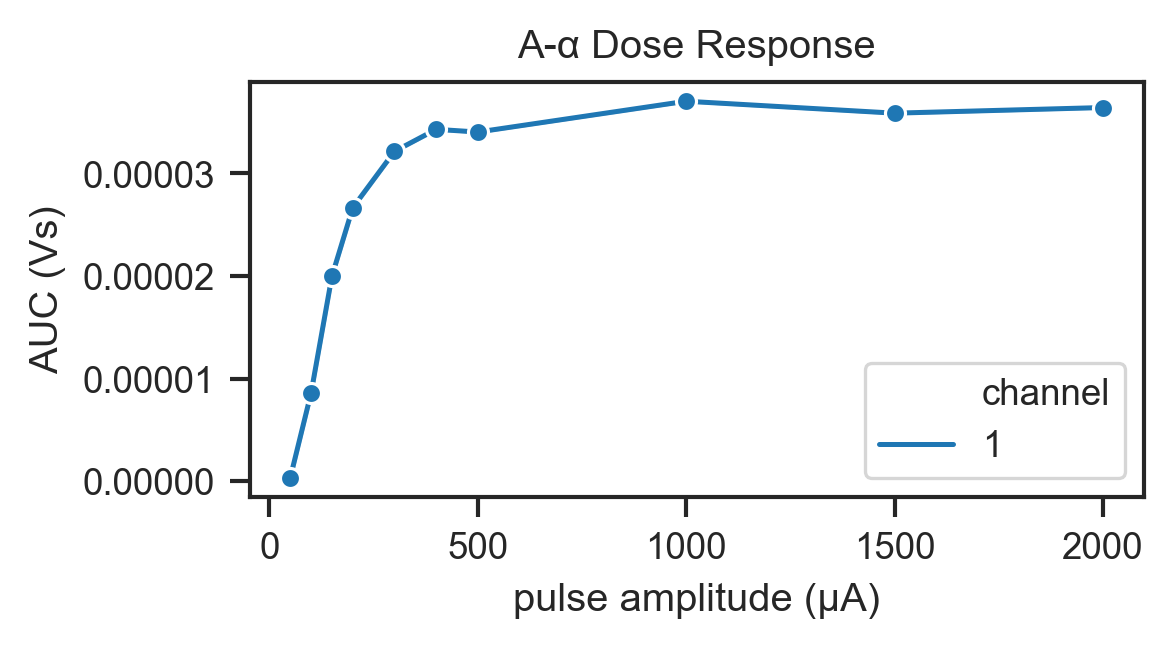

In [21]:
fig, ax = plt.subplots(1, dpi=300, figsize=(4,9./4))

sns.lineplot(x="pulse amplitude (μA)", y='AUC (Vs)',
             marker='o',
             estimator=np.mean,
             ci=0,
             hue="channel",
             data=df[(df["Calculation Window"] == "A-alpha") &
                     (df["Calculation Type"] == "RMS")], ax=ax)

ax.set_title('A-α Dose Response')
plt.tight_layout()
plt.show()